# Gaussian random fields and local non-Gaussianity

Florent Leclercq,<br/>
Imperial Centre for Inference and Cosmology, Imperial College London,<br/>
florent.leclercq@polytechnique.org

In [1]:
import numpy as np
import scipy.linalg
from scipy.stats import norm
from matplotlib import pyplot as plt
np.random.seed(123456)
%matplotlib inline

In [2]:
N=1000
epsilon=0.00000001

## Generate white noise

In [3]:
rv=norm(loc=0.,scale=1.)
x=np.linspace(-5,5,100)
whitenoise=np.random.normal(0.,1.,N)

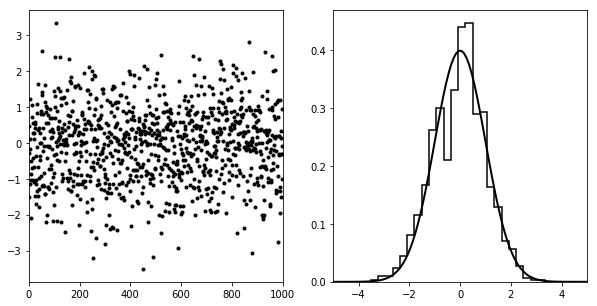

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_xlim(0,N)
ax1.scatter(np.arange(N),whitenoise,marker='.',color='black')
ax2.set_xlim(-5,5)
ax2.plot(x, rv.pdf(x), color='black', lw=2)
ax2.hist(whitenoise, bins='auto', density=True, color='black', histtype='step', lw=1.5)
plt.show()

## Setup covariance and generate Gaussian signal

### Covariance demo 1

$C_{ij} = \exp\left(-\dfrac{|i-j|}{20}\right)$

In [5]:
covar1=np.array([[np.exp(-np.abs((i-j)/20.)) for i in range(N)] for j in range(N)])

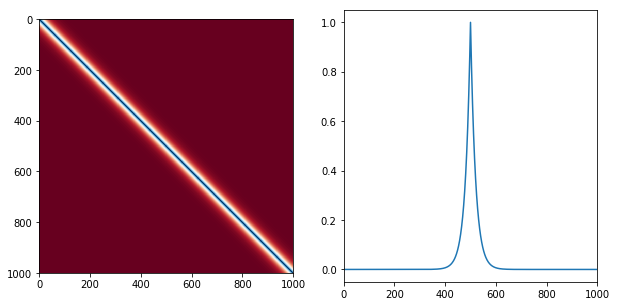

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(covar1, cmap='RdBu')
ax2.set_xlim(0,N)
ax2.plot(np.arange(N),covar1[N//2])
plt.show()

In [7]:
rootcovar1=scipy.linalg.sqrtm(covar1)
signal1=rootcovar1.dot(whitenoise).real

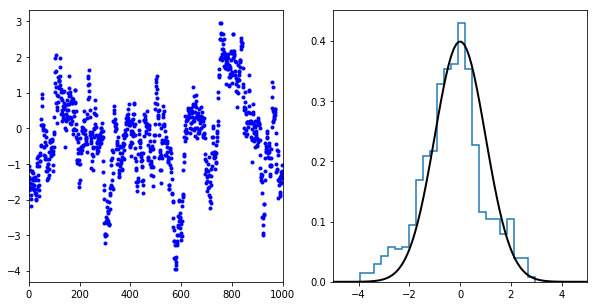

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_xlim(0,N)
ax1.scatter(np.arange(N),signal1,marker='.',color='blue')
ax2.set_xlim(-5,5)
ax2.plot(np.linspace(-5,5,100), norm(loc=0.,scale=1.).pdf(np.linspace(-5,5,100)), color='black', lw=2)
ax2.hist(signal1, bins='auto', density=True, histtype='step', lw=1.5)
plt.show()

### Covariance demo 2

$C_{ij}= \dfrac{1}{(1+|i-j|/2)^2}$

In [9]:
covar2=np.array([[1./(1+np.abs((i-j)/2.))**2 for i in range(N)] for j in range(N)])

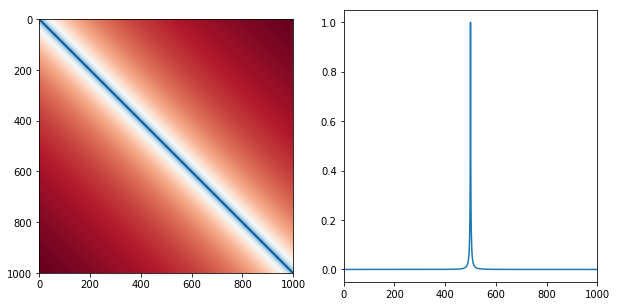

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(np.log(covar2+epsilon), cmap='RdBu')
ax2.set_xlim(0,N)
ax2.plot(np.arange(N),covar2[N//2])
plt.show()

In [11]:
rootcovar2=scipy.linalg.sqrtm(covar2)
signal2=rootcovar2.dot(whitenoise).real

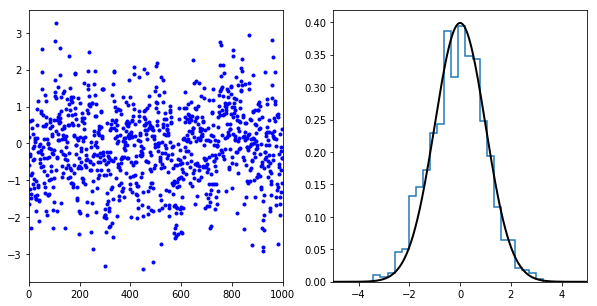

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_xlim(0,N)
ax1.scatter(np.arange(N),signal2,marker='.',color='blue')
ax2.set_xlim(-5,5)
ax2.plot(np.linspace(-5,5,1000), norm(loc=0.,scale=1.).pdf(np.linspace(-5,5,1000)), color='black', lw=2)
ax2.hist(signal2, bins='auto', density=True, histtype='step', lw=1.5)
plt.show()

### Covariance demo 3

$C_{ii}=\left\{
                \begin{array}{ll}
                  1~\mathrm{if}~i<N/2\\
                  100~\mathrm{otherwise}
                \end{array}
              \right.$<br/>
$C_{ij}=0$ for $i\neq j$

In [13]:
covar3=np.array([[(1. if i<N/2 else 100.) if i==j else 0. for i in range(N)] for j in range(N)])

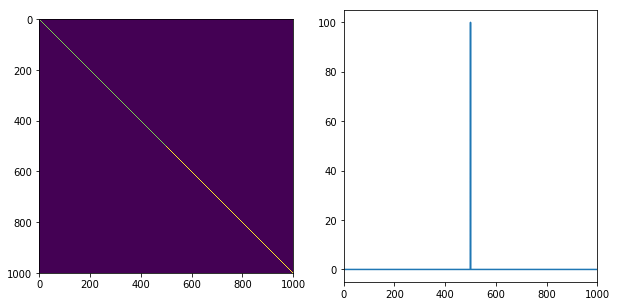

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(np.log(covar3+epsilon), cmap='viridis')
ax2.set_xlim(0,N)
ax2.plot(np.arange(N),covar3[N//2])
plt.show()

In [15]:
rootcovar3=scipy.linalg.sqrtm(covar3)
signal3=rootcovar3.dot(whitenoise).real

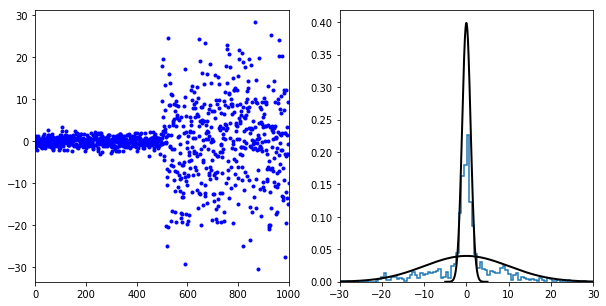

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_xlim(0,N)
ax1.scatter(np.arange(N),signal3,marker='.',color='blue')
ax2.set_xlim(-30,30)
ax2.plot(np.linspace(-5,5,1000), norm(loc=0.,scale=1.).pdf(np.linspace(-5,5,1000)), color='black', lw=2)
ax2.plot(np.linspace(-30,30,1000), norm(loc=0.,scale=10.).pdf(np.linspace(-30,30,1000)), color='black', lw=2)
ax2.hist(signal3, bins='auto', density=True, histtype='step', lw=1.5)
plt.show()

### Covariance demo 4

$C_{ij}=\cos\left(\dfrac{i-j}{8}\right)$

In [17]:
covar4=np.array([[np.cos((i-j)/8.) for i in range(N)] for j in range(N)])

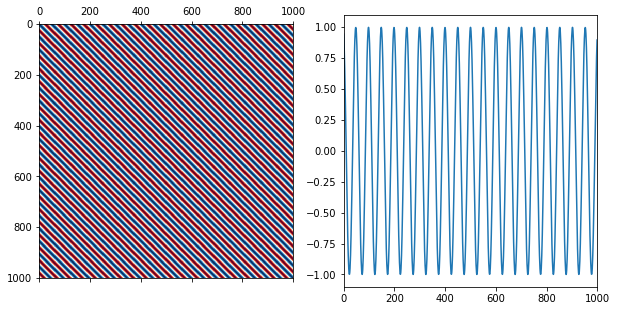

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.matshow(covar4, cmap='RdBu')
ax2.set_xlim(0,N)
ax2.plot(np.arange(N),covar4[N//2])
plt.show()

In [19]:
rootcovar4=scipy.linalg.sqrtm(covar4)
signal4=rootcovar4.dot(whitenoise).real

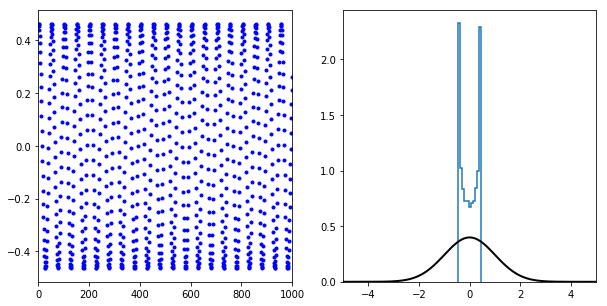

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_xlim(0,N)
ax1.scatter(np.arange(N),signal4,marker='.',color='blue')
ax2.set_xlim(-5,5)
ax2.plot(np.linspace(-5,5,1000), norm(loc=0.,scale=1.).pdf(np.linspace(-5,5,1000)), color='black', lw=2)
ax2.hist(signal4, bins='auto', density=True, histtype='step', lw=1.5)
plt.show()

Histograms of Gaussian random fields are not necessarily Gaussian!

## Generate non-Gaussian signal

A non-Gaussian signal, $s = \Phi + f_\mathrm{NL} \Phi^2$ where $\Phi$ is a Gaussian random field. In cosmology, this is called "local-type" non-Gaussianity. The 1-point pdf is skewed.

In [21]:
fNL=0.2
NGsignal=whitenoise+fNL*whitenoise**2

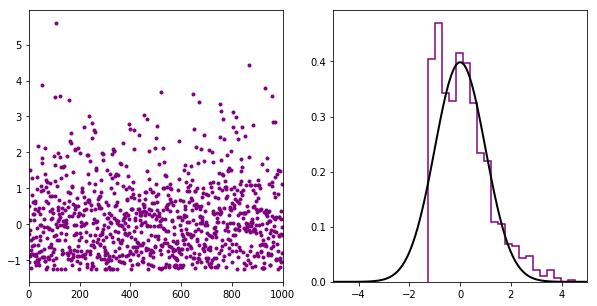

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_xlim(0,N)
ax1.scatter(np.arange(N),NGsignal,marker='.',color='purple')
ax2.set_xlim(-5,5)
ax2.plot(x, rv.pdf(x), color='black', lw=2)
ax2.hist(NGsignal, bins='auto', density=True, histtype='step', color='purple', lw=1.5)
plt.show()